In [1]:
import pandas as pd

train = pd.read_csv('/Users/lywoo/데이콘/부동산허위매물/train.csv')
test = pd.read_csv('/Users/lywoo/데이콘/부동산허위매물/test.csv')
sample = pd.read_csv('/Users/lywoo/데이콘/부동산허위매물/sample_submission.csv')

In [2]:
df_train = train.drop('허위매물여부', axis=1)
target = train['허위매물여부']

In [3]:
df_train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-p

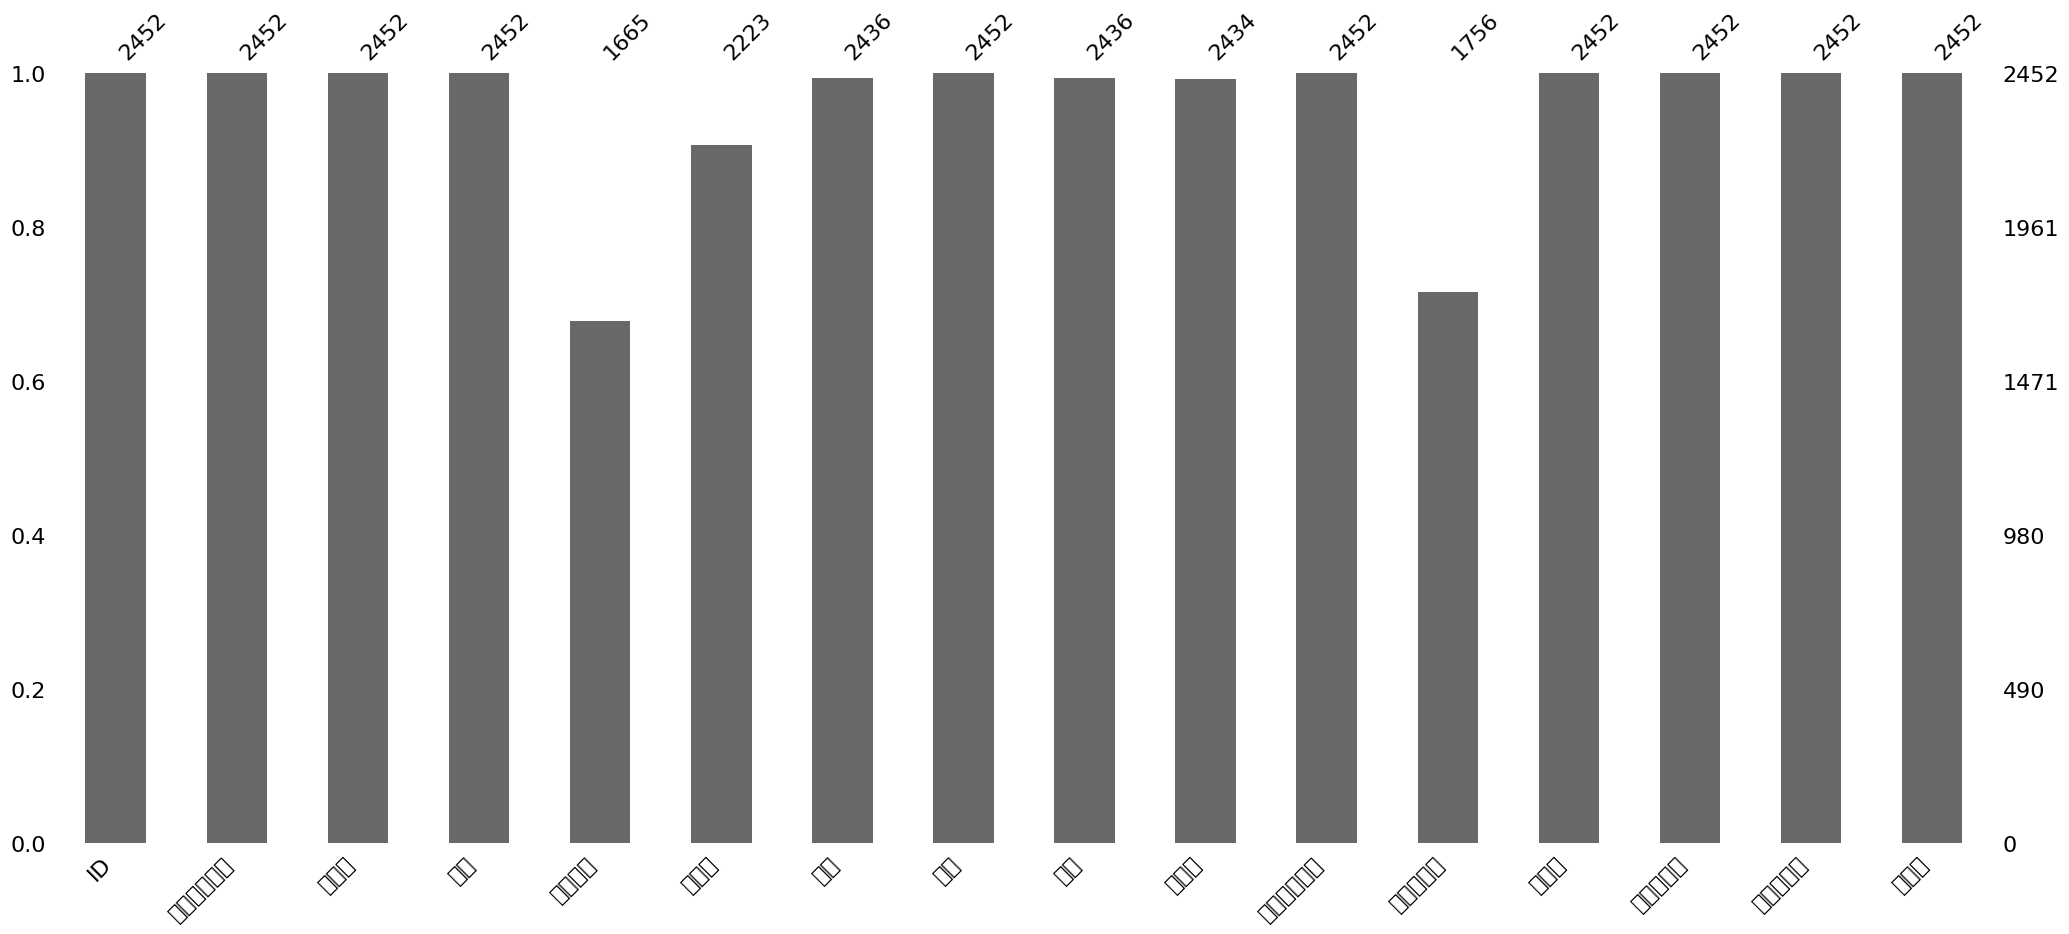

In [6]:
import missingno as msn
import matplotlib.pyplot as plt
%matplotlib inline

msn.bar(df_train)
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

plt.show()


In [7]:
numeric_train = df_train.select_dtypes(exclude='object')
object_train = df_train.select_dtypes(include='object')
print('numeric cols:', numeric_train.columns)
print('object cols:', object_train.columns)

numeric cols: Index(['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비'], dtype='object')
object cols: Index(['ID', '매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼', '게재일'], dtype='object')


<Axes: >

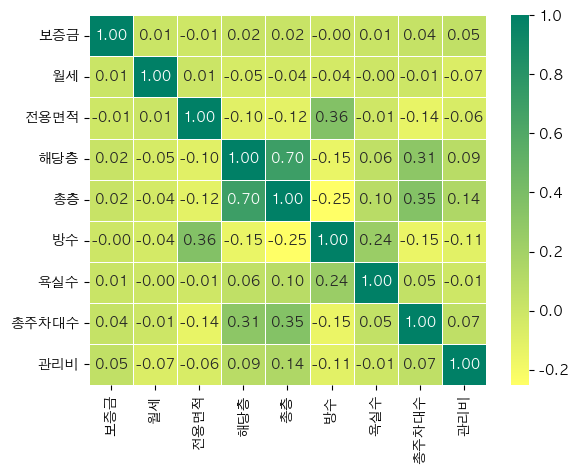

In [8]:
import seaborn as sns

sns.heatmap(numeric_train.corr(), cmap='summer_r', annot=True, fmt='.2f', linewidths=.5)

In [9]:
numeric_train['전용면적'].isnull().sum() / len(numeric_train['전용면적'])

0.3209624796084829

numeric data의 null값 확인

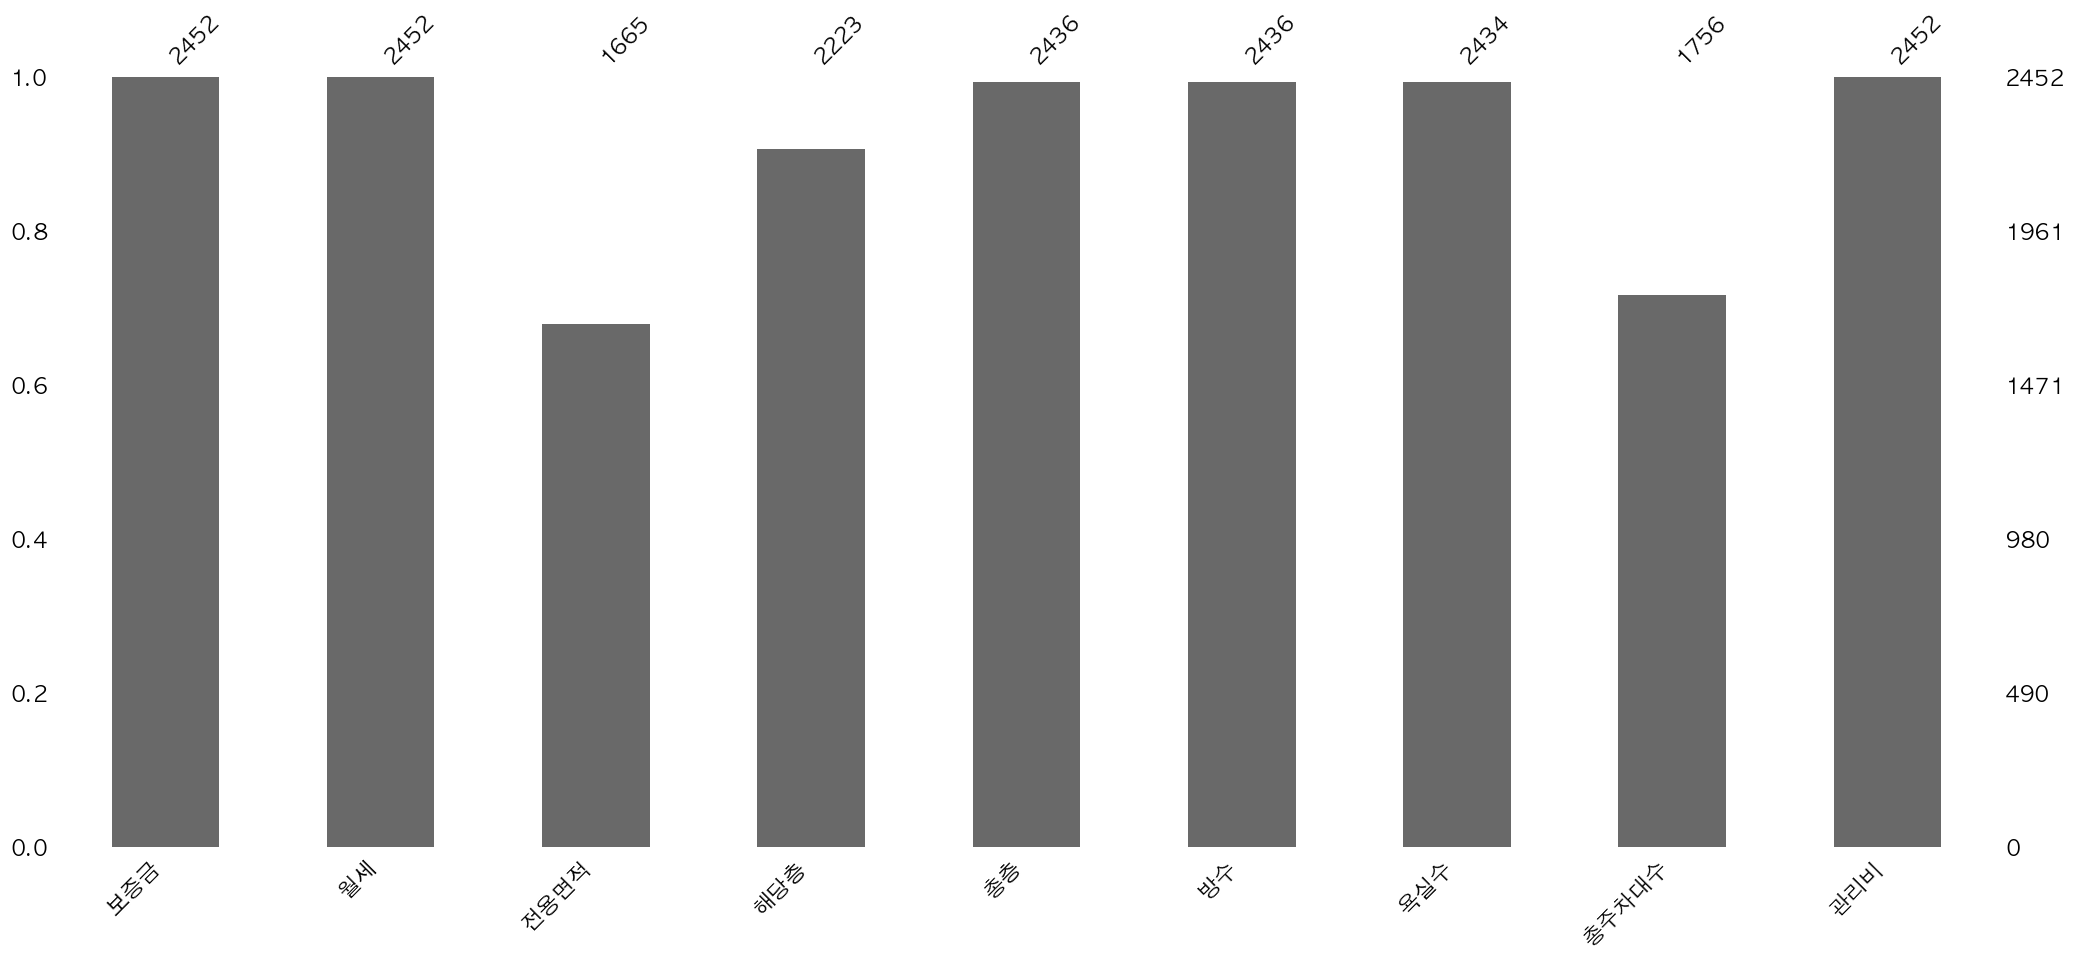

전용면적: 32.09624796084829 %
해당층: 9.33931484502447 %
총층: 0.6525285481239804 %
방수: 0.6525285481239804 %
욕실수: 0.734094616639478 %
총주차대수: 28.38499184339315 %


In [10]:
msn.bar(numeric_train)
plt.show()
for col in numeric_train.columns:
    if numeric_train[col].isnull().sum() > 0:
        print(col+':', ((numeric_train[col].isnull().sum() / len(numeric_train[col])) * 100), '%')

null이 1%이하인 것 max값으로 채우기(총층, 방수, 욕실수)

In [11]:
#총층
df_train['총층'].value_counts()
df_train['총층'].fillna(df_train['총층'].max(), inplace=True)
df_train['총층'].isnull().sum()

/var/folders/02/_mm3nt_520s7bxv6nfqf27vr0000gn/T/ipykernel_29822/1436355485.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['총층'].fillna(df_train['총층'].max(), inplace=True)


0

In [12]:
#방수
df_train['방수'].value_counts()
df_train['방수'].fillna(df_train['방수'].max(), inplace=True)
df_train['방수'].isnull().sum()

/var/folders/02/_mm3nt_520s7bxv6nfqf27vr0000gn/T/ipykernel_29822/1052984961.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['방수'].fillna(df_train['방수'].max(), inplace=True)


0

In [13]:
#욕실수
df_train['욕실수'].value_counts()
df_train['욕실수'].fillna(df_train['욕실수'].max(), inplace=True)
df_train['욕실수'].isnull().sum()

/var/folders/02/_mm3nt_520s7bxv6nfqf27vr0000gn/T/ipykernel_29822/320999685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['욕실수'].fillna(df_train['욕실수'].max(), inplace=True)


0

나머지(전용면적, 해당층, 총주차대수) //KNNImputer

In [14]:
df_train['전용면적'].isnull().sum()

787

In [15]:
df_train['전용면적'].value_counts()

전용면적
17.50    300
19.83     34
29.98     18
23.14     18
19.80     16
        ... 
36.96      1
23.77      1
48.60      1
36.92      1
29.26      1
Name: count, Length: 800, dtype: int64

In [16]:
#전용면적
#['보증금', '월세', '관리비'] : 결측치 없는 columns
#['전용면적'] : 결측치 채울 column
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
X = df_train[['보증금', '월세', '관리비'] + ['전용면적']] 
filled_전용면적 = imputer.fit_transform(X)
pd.DataFrame(filled_전용면적)

,0,1,2,3
0,402500000.0,470000.0,96.0,23.870000
1,170500000.0,200000.0,0.0,17.500000
2,114000000.0,380000.0,0.0,31.390000
3,163500000.0,30000.0,10.0,36.300000
4,346000000.0,530000.0,0.0,29.260000
...,...,...,...,...
2447,159000000.0,550000.0,0.0,48.950000
2448,158500000.0,750000.0,2.0,29.663333
2449,329000000.0,610000.0,10.0,17.500000
2450,31000000.0,400000.0,8.0,22.870000


In [17]:
df_train['전용면적'] = pd.DataFrame(filled_전용면적)[3]
df_train['전용면적']

0       23.870000
1       17.500000
2       31.390000
3       36.300000
4       29.260000
          ...    
2447    48.950000
2448    29.663333
2449    17.500000
2450    22.870000
2451    29.890000
Name: 전용면적, Length: 2452, dtype: float64

In [18]:
#해당층
df_train['해당층']

0       NaN
1       3.0
2       2.0
3       3.0
4       3.0
       ... 
2447    3.0
2448    2.0
2449    8.0
2450    8.0
2451    4.0
Name: 해당층, Length: 2452, dtype: float64

In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
X = df_train[['보증금', '월세', '관리비'] + ['해당층']]
filled_해당층 = imputer.fit_transform(X)
pd.DataFrame(filled_해당층)

,0,1,2,3
0,402500000.0,470000.0,96.0,2.666667
1,170500000.0,200000.0,0.0,3.000000
2,114000000.0,380000.0,0.0,2.000000
3,163500000.0,30000.0,10.0,3.000000
4,346000000.0,530000.0,0.0,3.000000
...,...,...,...,...
2447,159000000.0,550000.0,0.0,3.000000
2448,158500000.0,750000.0,2.0,2.000000
2449,329000000.0,610000.0,10.0,8.000000
2450,31000000.0,400000.0,8.0,8.000000


In [20]:
df_train['해당층'] = pd.DataFrame(filled_해당층)[3]
df_train['해당층'].isnull().sum()

0

In [21]:
#총주차대수
df_train['총주차대수']

0       40.0
1        NaN
2        NaN
3       13.0
4        NaN
        ... 
2447     NaN
2448     NaN
2449    29.0
2450     NaN
2451     8.0
Name: 총주차대수, Length: 2452, dtype: float64

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
X = df_train[['보증금', '월세', '관리비'] + ['총주차대수']]
filled_총주차대수 = imputer.fit_transform(X)
pd.DataFrame(filled_총주차대수)

,0,1,2,3
0,402500000.0,470000.0,96.0,40.0
1,170500000.0,200000.0,0.0,14.2
2,114000000.0,380000.0,0.0,13.0
3,163500000.0,30000.0,10.0,13.0
4,346000000.0,530000.0,0.0,11.8
...,...,...,...,...
2447,159000000.0,550000.0,0.0,30.2
2448,158500000.0,750000.0,2.0,18.6
2449,329000000.0,610000.0,10.0,29.0
2450,31000000.0,400000.0,8.0,26.6


In [23]:
df_train['총주차대수'] = pd.DataFrame(filled_총주차대수)[3]
df_train['총주차대수'].isnull().sum()

0

In [24]:
df_train.isnull().sum()

ID        0
매물확인방식    0
보증금       0
월세        0
전용면적      0
해당층       0
총층        0
방향        0
방수        0
욕실수       0
주차가능여부    0
총주차대수     0
관리비       0
중개사무소     0
제공플랫폼     0
게재일       0
dtype: int64

numeric_train null값 없앤 후 corr()

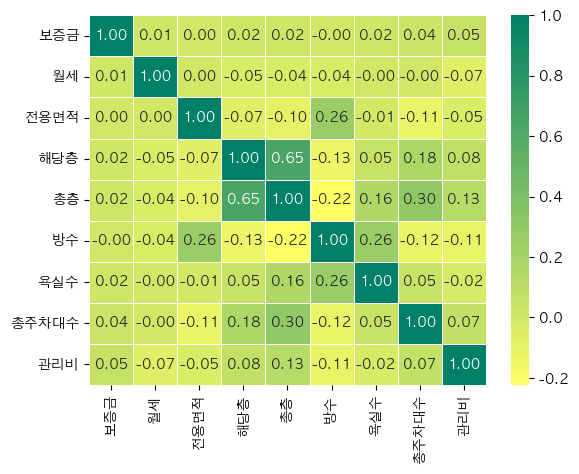

In [25]:
import seaborn as sns

update_numeric_train = df_train.select_dtypes(exclude='object')
sns.heatmap(update_numeric_train.corr(), cmap='summer_r', linewidths=0.5, annot=True, fmt='.2f')
plt.show()

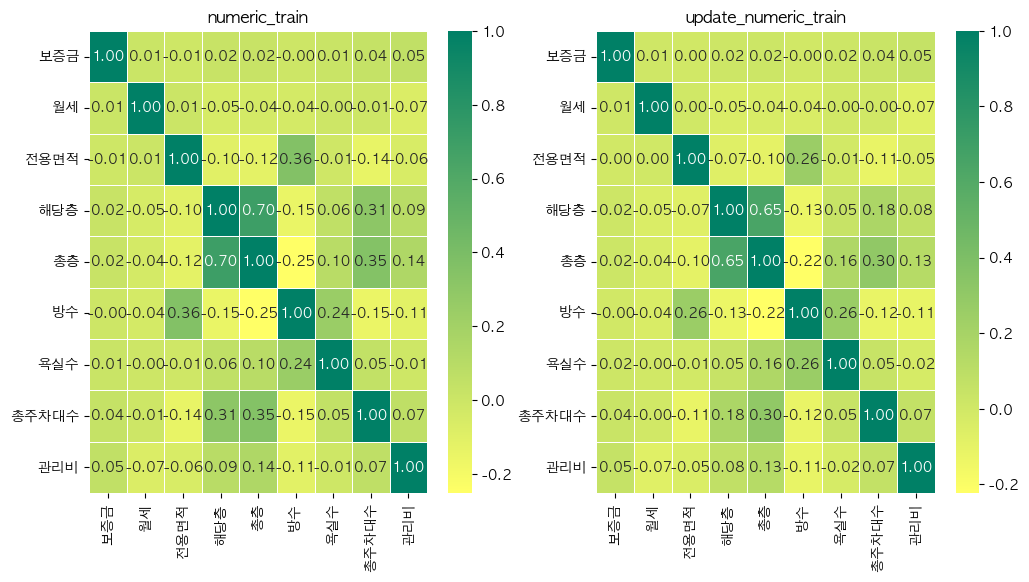

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(numeric_train.corr(), cmap='summer_r', linewidths=0.5, annot=True, fmt='.2f', ax=ax[0])
ax[0].set_title('numeric_train')

sns.heatmap(update_numeric_train.corr(), cmap='summer_r', linewidths=0.5, annot=True, fmt='.2f', ax=ax[1])
ax[1].set_title('update_numeric_train')
plt.show()


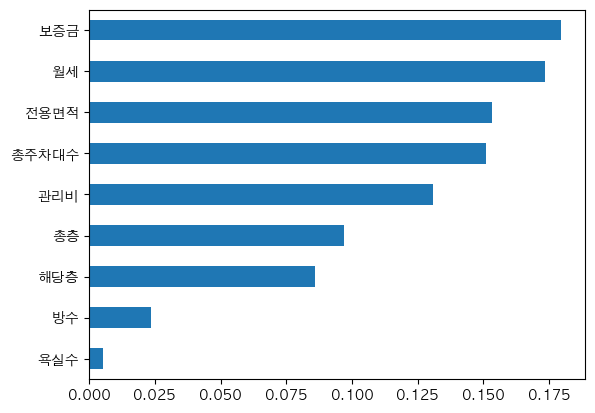

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
X = update_numeric_train
y = target

model.fit(X, y)

ser = pd.Series(model.feature_importances_, index=X.columns)

ser.sort_values().plot.barh()
plt.show()

In [28]:
update_numeric_train

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
0,402500000.0,470000,23.870000,2.666667,15.0,1.0,1.0,40.0,96
1,170500000.0,200000,17.500000,3.000000,4.0,2.0,1.0,14.2,0
2,114000000.0,380000,31.390000,2.000000,3.0,1.0,1.0,13.0,0
3,163500000.0,30000,36.300000,3.000000,9.0,2.0,1.0,13.0,10
4,346000000.0,530000,29.260000,3.000000,3.0,2.0,1.0,11.8,0
...,...,...,...,...,...,...,...,...,...
2447,159000000.0,550000,48.950000,3.000000,3.0,2.0,1.0,30.2,0
2448,158500000.0,750000,29.663333,2.000000,4.0,1.0,1.0,18.6,2
2449,329000000.0,610000,17.500000,8.000000,20.0,1.0,1.0,29.0,10
2450,31000000.0,400000,22.870000,8.000000,9.0,2.0,1.0,26.6,8


df_train에서 drop할 column 선택(numeric data)

In [29]:
# 해당층, 방수, 욕실수 drop
drop_df_train = df_train.drop(['해당층', '방수', '욕실수'], axis=1)
drop_df_train

,ID,매물확인방식,보증금,월세,전용면적,총층,방향,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TRAIN_0000,현장확인,402500000.0,470000,23.870000,15.0,서향,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09
1,TRAIN_0001,현장확인,170500000.0,200000,17.500000,4.0,남동향,불가능,14.2,0,q39iV5J4E6,D플랫폼,2024-12-26
2,TRAIN_0002,전화확인,114000000.0,380000,31.390000,3.0,동향,불가능,13.0,0,b03oE4G3F6,A플랫폼,2024-11-28
3,TRAIN_0003,현장확인,163500000.0,30000,36.300000,9.0,남동향,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26
4,TRAIN_0004,현장확인,346000000.0,530000,29.260000,3.0,동향,불가능,11.8,0,N45gM0M7R0,B플랫폼,2024-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,TRAIN_2447,서류확인,159000000.0,550000,48.950000,3.0,남향,불가능,30.2,0,d22DX4Y4P8,B플랫폼,2024-11-16
2448,TRAIN_2448,서류확인,158500000.0,750000,29.663333,4.0,남향,불가능,18.6,2,g99sy3I3R8,A플랫폼,2024-10-06
2449,TRAIN_2449,전화확인,329000000.0,610000,17.500000,20.0,남서향,가능,29.0,10,G52Iz8V2B9,B플랫폼,2024-05-15
2450,TRAIN_2450,현장확인,31000000.0,400000,22.870000,9.0,남동향,가능,26.6,8,m69GM9O9B3,B플랫폼,2024-08-06


df_train에서 drop할 column 선택(object data)

In [30]:
object_train.nunique()

ID        2452
매물확인방식       3
방향           8
주차가능여부       2
중개사무소      279
제공플랫폼       13
게재일        534
dtype: int64

*Onehotencoder & Feature Importance*

In [31]:
from sklearn.preprocessing import OneHotEncoder


df1 = df_train[['매물확인방식', '방향', '제공플랫폼']]
ohe = OneHotEncoder(sparse_output=False)
df2 = ohe.fit_transform(df1)
feature_names = ohe.get_feature_names_out()
df3 = pd.DataFrame(df2, columns=feature_names)
df3

,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인,방향_남동향,방향_남서향,방향_남향,방향_동향,방향_북동향,방향_북서향,방향_북향,...,제공플랫폼_D플랫폼,제공플랫폼_E플랫폼,제공플랫폼_F플랫폼,제공플랫폼_G플랫폼,제공플랫폼_H플랫폼,제공플랫폼_I플랫폼,제공플랫폼_J플랫폼,제공플랫폼_K플랫폼,제공플랫폼_L플랫폼,제공플랫폼_M플랫폼
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2449,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2450,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


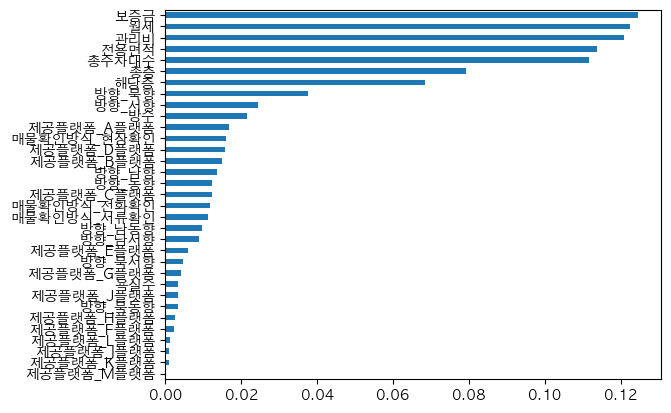

In [32]:
# numeric + ['매물확인방식', '방향', '제공플랫폼'](onehotencoder)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
X = pd.concat([df_train.select_dtypes(exclude='object'), df3], axis=1)
y = target
model.fit(X, y)
ser = pd.Series(model.feature_importances_, index=X.columns)

ser.sort_values().plot.barh()
plt.show()

*LabelEncoder & Feature Importance로 했을 때*

In [33]:
from sklearn.preprocessing import LabelEncoder

df_labelencode = object_train.copy()

label_encoder = {}
for col in object_train.columns:
    le = LabelEncoder()
    df_labelencode[col] = le.fit_transform(object_train[col])
    label_encoder[col] = le

df_labelencode

,ID,매물확인방식,방향,주차가능여부,중개사무소,제공플랫폼,게재일
0,0,2,7,0,240,1,394
1,1,2,0,1,228,3,472
2,2,1,3,1,150,0,444
3,3,2,0,0,31,0,442
4,4,2,3,1,72,1,288
...,...,...,...,...,...,...,...
2447,2447,0,2,1,162,1,432
2448,2448,0,2,1,174,0,391
2449,2449,1,1,0,31,1,248
2450,2450,2,0,0,207,1,330


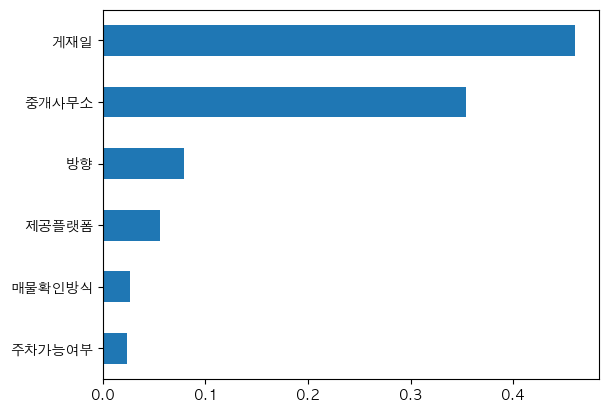

In [34]:
# object(labelencode)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
X = df_labelencode.drop('ID', axis=1)
y = target

model.fit(X, y)
ser = pd.Series(model.feature_importances_, index=X.columns)

ser.sort_values().plot.barh()
plt.show()

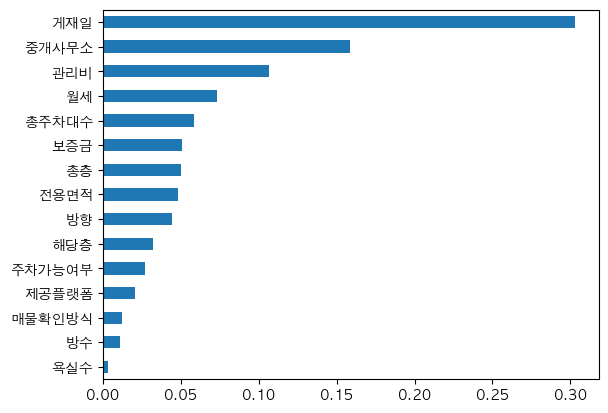

In [35]:
# numeric + object(labelencode)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
X = pd.concat([df_train.select_dtypes(exclude='object'), df_labelencode.drop('ID', axis=1)], axis=1)
y = target

model.fit(X, y)
ser = pd.Series(model.feature_importances_, index=X.columns)

ser.sort_values().plot.barh()
plt.show()

numeric data에서 drop할 columns: '해당층', '방수', '욕실수'<br><br>
object data에서 drop할 columns: 'ID', '제공플랫폼', '매물확인방식', '주차가능여부', '방향'<br><br>
(object data는 labelencode로 실시하였음)


In [41]:
df_train.drop(['해당층', '방수', '욕실수', '제공플랫폼', '매물확인방식', '주차가능여부', '방향'], axis=1, inplace=True)

In [49]:
df_train.drop('ID', axis=1, inplace=True)

In [53]:
df_train.head()

,보증금,월세,전용면적,총층,총주차대수,관리비,중개사무소,게재일
0,402500000.0,470000,23.87,15.0,40.0,96,t93Nt6I2I0,2024-10-09
1,170500000.0,200000,17.50,4.0,14.2,0,q39iV5J4E6,2024-12-26
2,114000000.0,380000,31.39,3.0,13.0,0,b03oE4G3F6,2024-11-28
3,163500000.0,30000,36.30,9.0,13.0,10,G52Iz8V2B9,2024-11-26
4,346000000.0,530000,29.26,3.0,11.8,0,N45gM0M7R0,2024-06-25


In [55]:
df_train_object = df_train.select_dtypes(include='object')
df_train_object

,중개사무소,게재일
0,t93Nt6I2I0,2024-10-09
1,q39iV5J4E6,2024-12-26
2,b03oE4G3F6,2024-11-28
3,G52Iz8V2B9,2024-11-26
4,N45gM0M7R0,2024-06-25
...,...,...
2447,d22DX4Y4P8,2024-11-16
2448,g99sy3I3R8,2024-10-06
2449,G52Iz8V2B9,2024-05-15
2450,m69GM9O9B3,2024-08-06


In [56]:
#df_train의 object data를 LabelEncoder로 전환
from sklearn.preprocessing import LabelEncoder

for col in df_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

In [60]:
df_train.head()

,보증금,월세,전용면적,총층,총주차대수,관리비,중개사무소,게재일
0,402500000.0,470000,23.87,15.0,40.0,96,240,394
1,170500000.0,200000,17.50,4.0,14.2,0,228,472
2,114000000.0,380000,31.39,3.0,13.0,0,150,444
3,163500000.0,30000,36.30,9.0,13.0,10,31,442
4,346000000.0,530000,29.26,3.0,11.8,0,72,288


## df_train 분리

In [68]:
# 단순 train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, pred))

Accuracy Score: 0.9415760869565217


In [71]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rfc = RandomForestClassifier(random_state=0)
s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

n_iter = 0
cv_accuracy = []

for train_idx, test_idx in s_kfold.split(df_train, target):
    x_train, x_test = df_train.iloc[train_idx], df_train.iloc[test_idx]
    y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]
    
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    accuracy = np.round(accuracy_score(pred, y_test), 4)
    cv_accuracy.append(accuracy)

print('교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('평균 검증 정확도:', np.mean(cv_accuracy))
    

교차 검증별 정확도: [0.9593 0.9511 0.9286 0.9571 0.9776]
평균 검증 정확도: 0.9547399999999999


In [72]:
# GridSearchCV + Stratified KFold -> 같이 사용하는 것이 결론
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(df_train, target)

print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9551377862754062


## test 데이터 조정 및 모델 적용

train에서 drop시킨 columns<br>
: ['ID', '해당층', '방수', '욕실수', '제공플랫폼', '매물확인방식', '주차가능여부', '방향']



In [81]:
test = pd.read_csv('/Users/lywoo/데이콘/부동산허위매물/test.csv')
test

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03
3,TEST_003,서류확인,133000000.0,250000,31.35,5.0,6.0,남향,2.0,1.0,가능,NaN,5,C41wx1K6U9,B플랫폼,2024-09-19
4,TEST_004,현장확인,108000000.0,380000,23.14,2.0,3.0,남향,1.0,1.0,불가능,NaN,0,Z68ZJ6F6L4,A플랫폼,2024-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,TEST_608,현장확인,152500000.0,340000,30.83,4.0,6.0,남동향,1.0,1.0,가능,1.0,2,j90UQ8N6M3,A플랫폼,2024-09-24
609,TEST_609,전화확인,226500000.0,750000,29.88,NaN,10.0,남서향,2.0,1.0,가능,34.0,7,r82ax9M3U3,B플랫폼,2024-09-04
610,TEST_610,현장확인,169500000.0,500000,30.73,5.0,6.0,남향,1.0,1.0,불가능,33.0,6,G52Iz8V2B9,F플랫폼,2024-04-20
611,TEST_611,현장확인,180000000.0,340000,17.50,3.0,6.0,남동향,1.0,1.0,가능,2.0,8,J52gJ2E4T6,C플랫폼,2024-11-17


train과 같은 columns test도 drop

In [82]:
fix_test = test.drop(['ID', '해당층', '방수', '욕실수', '제공플랫폼', '매물확인방식', '주차가능여부', '방향'], axis=1)
fix_test

,보증금,월세,전용면적,총층,총주차대수,관리비,중개사무소,게재일
0,223000000.0,530000,NaN,5.0,NaN,7,Z86Th6S3K5,2024-10-21
1,150500000.0,590000,30.26,11.0,16.0,11,G52Iz8V2B9,2023-09-02
2,47000000.0,200000,41.50,3.0,NaN,0,N45gM0M7R0,2024-04-03
3,133000000.0,250000,31.35,6.0,NaN,5,C41wx1K6U9,2024-09-19
4,108000000.0,380000,23.14,3.0,NaN,0,Z68ZJ6F6L4,2024-11-10
...,...,...,...,...,...,...,...,...
608,152500000.0,340000,30.83,6.0,1.0,2,j90UQ8N6M3,2024-09-24
609,226500000.0,750000,29.88,10.0,34.0,7,r82ax9M3U3,2024-09-04
610,169500000.0,500000,30.73,6.0,33.0,6,G52Iz8V2B9,2024-04-20
611,180000000.0,340000,17.50,6.0,2.0,8,J52gJ2E4T6,2024-11-17


In [83]:
test_id = test['ID']
test_id

0      TEST_000
1      TEST_001
2      TEST_002
3      TEST_003
4      TEST_004
         ...   
608    TEST_608
609    TEST_609
610    TEST_610
611    TEST_611
612    TEST_612
Name: ID, Length: 613, dtype: object

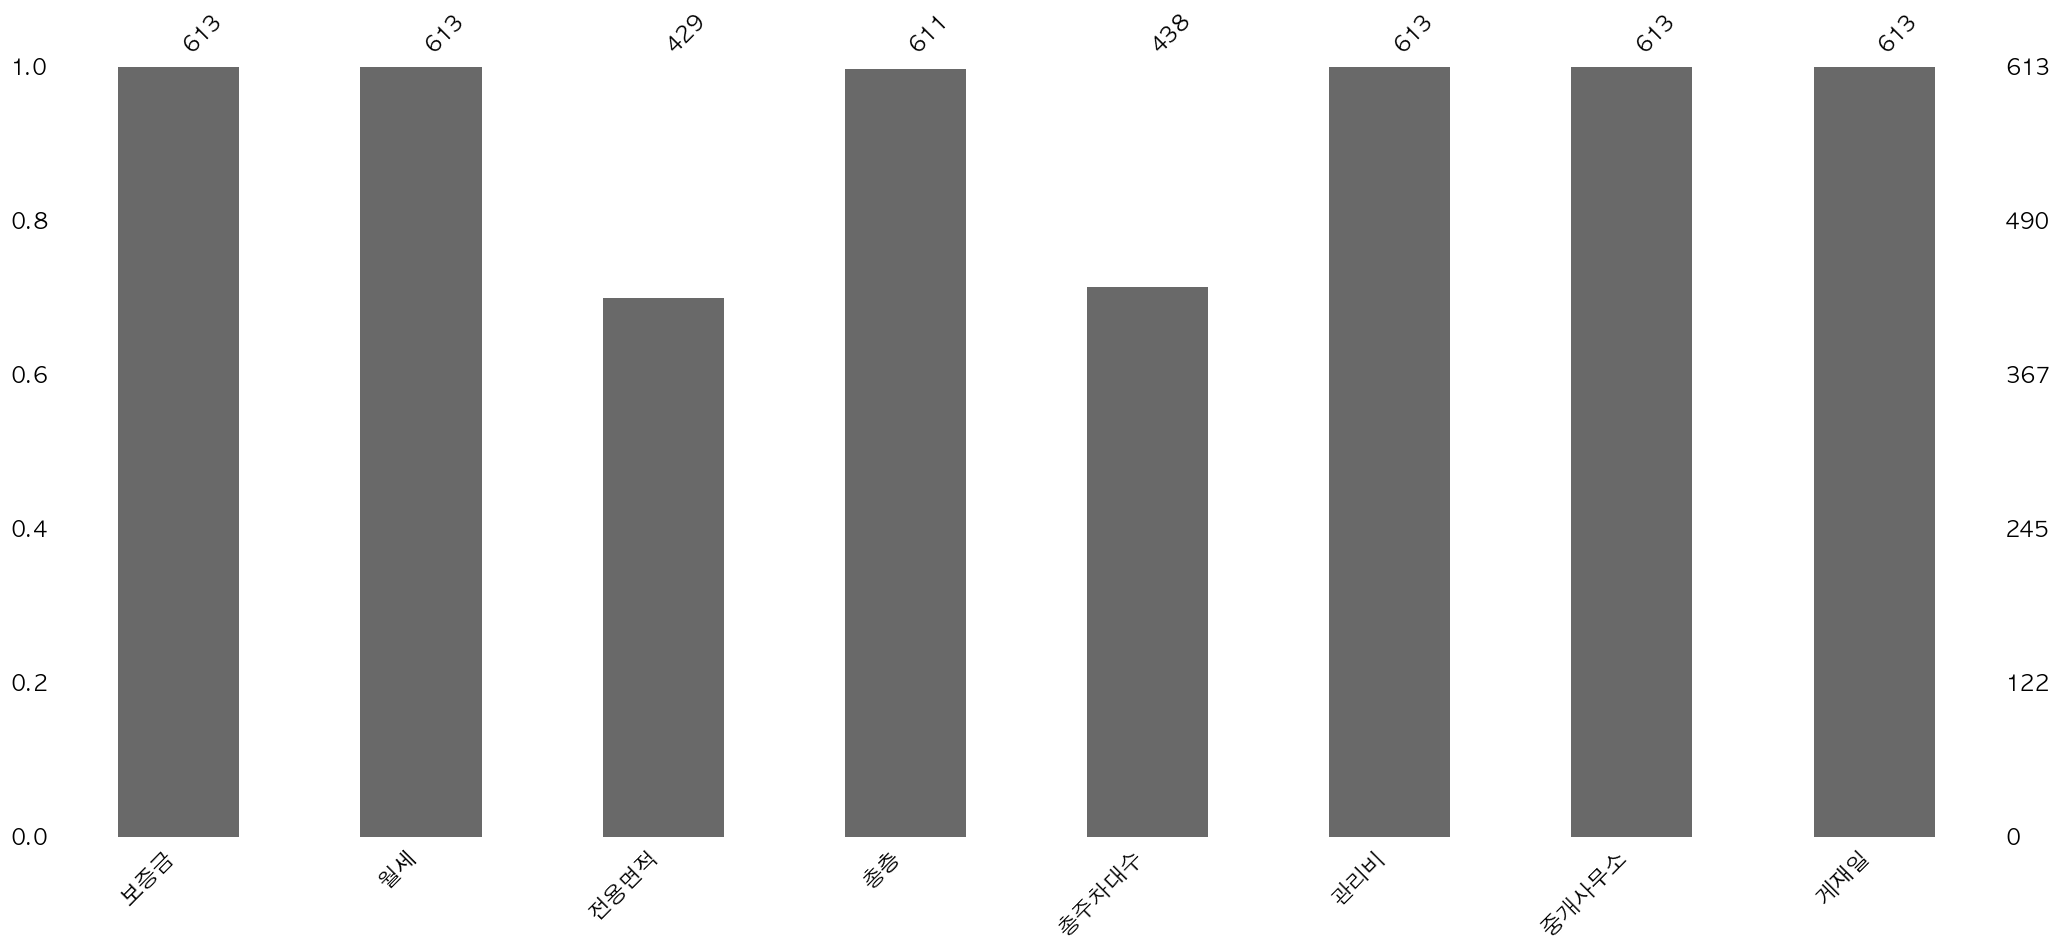

<Figure size 800x800 with 0 Axes>

In [86]:
import missingno as msno
import seaborn as sns
%matplotlib inline

msno.bar(fix_test)
plt.figure(figsize=(8, 8))
plt.show()

fix_test null 값 채우기

In [95]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df = fix_test.select_dtypes(exclude='object')
filled = imputer.fit_transform(df)
fix_test['전용면적'] = pd.DataFrame(filled).iloc[:, 2]
fix_test['총층'] = pd.DataFrame(filled).iloc[:, 3]
fix_test['총주차대수'] = pd.DataFrame(filled).iloc[:, 4]

In [98]:
fix_test

,보증금,월세,전용면적,총층,총주차대수,관리비,중개사무소,게재일
0,223000000.0,530000,29.906667,5.0,14.000000,7,Z86Th6S3K5,2024-10-21
1,150500000.0,590000,30.260000,11.0,16.000000,11,G52Iz8V2B9,2023-09-02
2,47000000.0,200000,41.500000,3.0,37.333333,0,N45gM0M7R0,2024-04-03
3,133000000.0,250000,31.350000,6.0,7.666667,5,C41wx1K6U9,2024-09-19
4,108000000.0,380000,23.140000,3.0,23.000000,0,Z68ZJ6F6L4,2024-11-10
...,...,...,...,...,...,...,...,...
608,152500000.0,340000,30.830000,6.0,1.000000,2,j90UQ8N6M3,2024-09-24
609,226500000.0,750000,29.880000,10.0,34.000000,7,r82ax9M3U3,2024-09-04
610,169500000.0,500000,30.730000,6.0,33.000000,6,G52Iz8V2B9,2024-04-20
611,180000000.0,340000,17.500000,6.0,2.000000,8,J52gJ2E4T6,2024-11-17


object data labelencoder로 numeric data로 변경

In [99]:
from sklearn.preprocessing import LabelEncoder

for col in fix_test.select_dtypes(include='object').columns:
    le = LabelEncoder()
    fix_test[col] = le.fit_transform(fix_test[col])

fix_test

,보증금,월세,전용면적,총층,총주차대수,관리비,중개사무소,게재일
0,223000000.0,530000,29.906667,5.0,14.000000,7,105,228
1,150500000.0,590000,30.260000,11.0,16.000000,11,19,10
2,47000000.0,200000,41.500000,3.0,37.333333,0,52,90
3,133000000.0,250000,31.350000,6.0,7.666667,5,8,198
4,108000000.0,380000,23.140000,3.0,23.000000,0,102,245
...,...,...,...,...,...,...,...,...
608,152500000.0,340000,30.830000,6.0,1.000000,2,133,203
609,226500000.0,750000,29.880000,10.0,34.000000,7,155,183
610,169500000.0,500000,30.730000,6.0,33.000000,6,19,100
611,180000000.0,340000,17.500000,6.0,2.000000,8,37,252


In [116]:
model = grid.best_estimator_

pred = model.predict(fix_test)
sub = pd.concat([test_id, pd.DataFrame(pred)], axis=1)
sub.rename(columns={0 : '허위매물여부'}, inplace=True)
sub

sub.to_csv('부동산_sub.csv', index=False)